In [1]:
%matplotlib notebook
#%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Algebra lineal con NumPy

### Sistema de ecuaciones cuadrado (Caso $N=M$)

### Ejercicio práctico

Sea el sistema de ecuaciones

$$
\begin{align}
-x_{1} + 5 x_{2} &= 2 \nonumber \\
2 x_{1} + 3 x_{2} &= 1  \nonumber 
\end{align}
$$


1. ¿Cuántas ecuaciones e incógnitas tiene este sistema? ¿Es este un sistema cuadrado?

   **R:** El sistema tiene dos ecuaciones, con dos incógnitas. El sistema es cuadrado.

2. Escriba $A$, $b$  y compruebe si $A$ es invertible (determinante y rango)

In [2]:
A = np.array([[-1. , 5.], [2., 3.]])
b = np.array([2., 1.])

assert not np.linalg.det(A)==0 ,"Determinante igual a 0" 
assert np.linalg.matrix_rank(A)== A.shape[1], "Columnas no son LI"
detA = np.linalg.det(A)
rangA = np.linalg.matrix_rank(A)
print('Determinate A:', detA, '\nRango A:', rangA)

Determinate A: -13.0 
Rango A: 2


3. Encuentre la inversa de $A$ y usela para calcular $x$

In [3]:
invA = np.linalg.inv(A)
x = np.dot(invA,b)
print('x =',x)

x = [-0.07692308  0.38461538]


4. (Extra) Represente geometricamente el sistema y encuentra la solución de forma gráfica

<IPython.core.display.Javascript object>


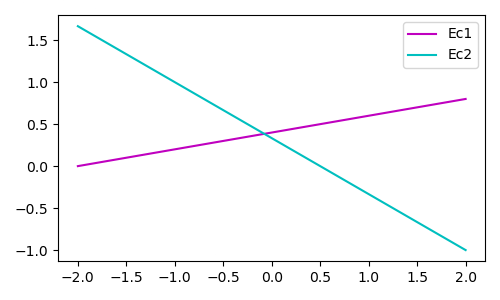

In [4]:
def graf(A,b):
    fig, ax = plt.subplots(figsize =(5,3),tight_layout = True)
    x1 = np.linspace(-2, 2, num=100)
    ax.plot(x1, (b[0]-A[0,0]*x1)/A[0,1],label='Ec1',c='m')
    ax.plot(x1, (b[1]-A[1,0]*x1)/A[1,1],label='Ec2',c='c')
    plt.legend();
graf(A,b)

Repita para los sistemas

$$
\begin{align}
x_{1} + 5 x_{2} &= 2 \nonumber \\
2 x_{1} + 10 x_{2} &= 6  \nonumber 
\end{align}
$$

y

$$
\begin{align}
x_{1} + 5 x_{2} &= 2 \nonumber \\
2 x_{1} + 10 x_{2} &= 4  \nonumber 
\end{align}
$$

¿Qué puede decir de estos sistemas?

In [5]:
def sol_x(A,b):
    assert not np.linalg.det(A)==0 ,"Determinante igual a 0" 
    assert np.linalg.matrix_rank(A)== A.shape[1], "Columnas no son LI"
    detA = np.linalg.det(A)
    rangA = np.linalg.matrix_rank(A)
    print('Determinate A:', detA, '\nRango A:', rangA)
    invA = np.linalg.inv(A)
    x = np.dot(invA,b)
    print('x =',x)
    return x

<IPython.core.display.Javascript object>


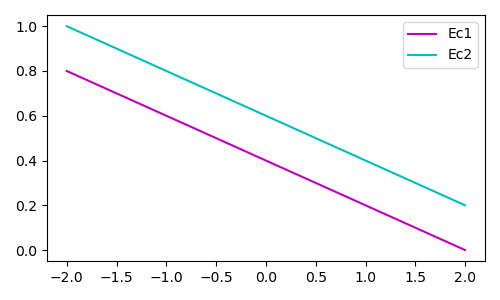

In [6]:
A = np.array([[1.,5.],[2.,10.]])
b = np.array([2.,6.])
#sol_x(A,b)
graf(A,b)

    El sistema no tiene solución(Rectas paralelas).

<IPython.core.display.Javascript object>


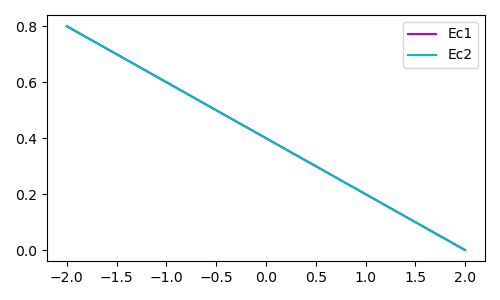

In [7]:
A = np.array([[1., 5.],[2.,10.]])
b = np.array([2.,4.]) 
#sol_x(A,b)
graf(A,b)

    El sistema no es LI, no tiene solución(hay solo una ecuacuón).

-----

### Ejercicio práctico

Encuentre los parámetros de la **ecuación de la recta** que ajuste mejor los datos 

$$
\text{consumo} = \theta_1 \cdot \text{temperatura} + \theta_0
$$

- Identifique y construya el vector $b$ y la matriz $A$ ¿Cuánto vale $N$ y $M$?
- ¿Es este un sistema cuadrado o rectangular? ¿ Es sobre o infra-determinado?
- Encuentre $\theta_0$ y $\theta_1$ que minimiza la suma de errores cuadráticos
- Grafique la recta encontrada usando `matplotlib`

In [8]:
df = pd.read_csv('data/helados.csv', index_col=0)
display(df.head())

,cons,income,price,temp
1,0.386,78,0.270,41
2,0.374,79,0.282,56
3,0.393,81,0.277,63
4,0.425,80,0.280,68
5,0.406,76,0.272,69


- Identifique y construya el vector $b$ y la matriz $A$ ¿Cuánto vale $N$ y $M$?

In [9]:
b = df['cons'].values
A = np.ones(shape=(len(b),2))
A[:,1]=df['temp'].values
display(b, A)

array([0.386, 0.374, 0.393, 0.425, 0.406, 0.344, 0.327, 0.288, 0.269,
       0.256, 0.286, 0.298, 0.329, 0.318, 0.381, 0.381, 0.47 , 0.443,
       0.386, 0.342, 0.319, 0.307, 0.284, 0.326, 0.309, 0.359, 0.376,
       0.416, 0.437, 0.548])

array([[ 1., 41.],
       [ 1., 56.],
       [ 1., 63.],
       [ 1., 68.],
       [ 1., 69.],
       [ 1., 65.],
       [ 1., 61.],
       [ 1., 47.],
       [ 1., 32.],
       [ 1., 24.],
       [ 1., 28.],
       [ 1., 26.],
       [ 1., 32.],
       [ 1., 40.],
       [ 1., 55.],
       [ 1., 63.],
       [ 1., 72.],
       [ 1., 72.],
       [ 1., 67.],
       [ 1., 60.],
       [ 1., 44.],
       [ 1., 40.],
       [ 1., 32.],
       [ 1., 27.],
       [ 1., 28.],
       [ 1., 33.],
       [ 1., 41.],
       [ 1., 52.],
       [ 1., 64.],
       [ 1., 71.]])

- ¿Es este un sistema cuadrado o rectangular? ¿ Es sobre o infra-determinado?

            Sistema rectangular sobredeterminado, tiene más ecuaciones que incógnitas.

- Encuentre $\theta_0$ y $\theta_1$ que minimiza la suma de errores cuadráticos


In [10]:
theta = np.linalg.lstsq(A,b, rcond=None)[0]
display(theta)

array([0.20686215, 0.00310736])

- Grafique la recta encontrada usando `matplotlib`

<IPython.core.display.Javascript object>


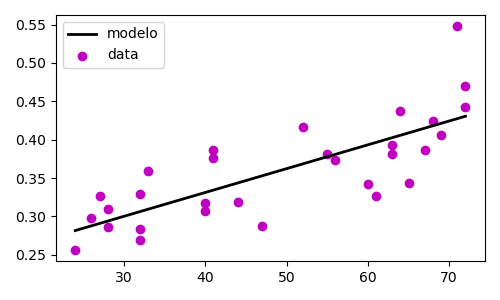

In [11]:
fig, ax = plt.subplots(figsize=(5,3),tight_layout=True)
ax.scatter(df['temp'], df['cons'], c='m', label='data')
#vector de temperaturas:desde  temperatura minima y hasta temp maxima
t_plot = np.linspace(np.amin(A[:,1]), np.amax(A[:,1]),num=100)
ax.plot(t_plot,theta[0]+theta[1]*t_plot, 'k-', lw=2, label='modelo')
plt.legend();